🌈 A simple linear regression model does not include an activation function and predicts continuous values. In contrast, models like Perceptron and Logistic Regression include activation functions that map the input to a binary output, making them suitable for classification tasks by providing non-linear decision boundaries.

🌈 A decision tree is a non-parametric supervised learning method used for classification and regression. It splits the data into subsets based on the value of input features, aiming to minimize impurity in the resulting subsets. Logistic regression, on the other hand, is a linear model that predicts the probability of a binary outcome based on input features, using a logistic function to map the linear combination of features to the probability space.

🌈 Grid search exhaustively searches through a manually specified subset of hyperparameters, evaluating all possible combinations, whereas random search randomly samples hyperparameters from a given distribution for a fixed number of iterations.

🌈 Bayesian search, such as Bayesian Optimization, uses probabilistic models to select the next hyperparameters to evaluate based on the outcomes of past evaluations, aiming to efficiently explore the hyperparameter space and find optimal values. In contrast, random search does not utilize past evaluations and randomly samples hyperparameters from a given distribution.

✔️ Problem Formulation:

Define the problem:
The problem is to develop a machine learning model for binary classification to predict the outcome of a specific speed dating session based on the profiles of two people. This is part of implementing a recommendation system to better match people in speed dating events. The dataset contains a lot of missing values. The strategy for missing value replacement needs to be tuned. Additionally, the dataset is highly unbalanced, with most samples being unmatched. The goal is to treat the complete workflow from data preprocessing to model training as a single pipeline and search for the hyperparameters for this pipeline.

What is the input?
The input consists of features describing the profiles of two individuals participating in a speed dating session. These features could include demographic information (age, gender, race), interests, hobbies, personality traits, and other relevant attributes.

What is the output?
The output is the probability (ranging from 0 to 1 as a float) that the dating session will lead to a successful match. A successful match indicates that both individuals expressed mutual interest in each other after the speed dating session.

What data mining function is required?
The required data mining function is binary classification. The goal is to predict whether a speed dating session will result in a successful match or not based on the input features. Various classification algorithms can be employed, such as logistic regression, decision trees, random forests, support vector machines, or gradient boosting classifiers.

What could be the challenges?
Challenges in this task may include:

1. Dealing with Missing Values: Developing a strategy to handle missing values in the dataset. Since the dataset contains a lot of missing values, the choice of replacement strategy can significantly impact model performance.

2. Addressing Class Imbalance: Since most speed dating sessions may result in unmatched individuals, the dataset is highly unbalanced. Techniques such as oversampling the minority class, undersampling the majority class, or using class-weighted loss functions may be required to address this imbalance.

3. Model Selection and Hyperparameter Tuning: Choosing an appropriate classification algorithm and optimizing its hyperparameters to achieve the best performance. Considering the entire pipeline from data preprocessing to model training as a single entity adds complexity to hyperparameter tuning.

4. Interpretability: Ensuring that the final model is interpretable, allowing stakeholders to understand the factors influencing the prediction of successful matches.

What is the impact?
A successful implementation of the recommendation system can significantly enhance the speed dating experience by improving match quality and increasing participant satisfaction. By accurately predicting the probability of successful matches, event organizers can better pair individuals with compatible profiles, leading to more enjoyable and successful speed dating sessions.

What is an ideal solution?
An ideal solution would be a well-performing classification model that accurately predicts the probability of successful matches in speed dating sessions. The solution should include an end-to-end pipeline encompassing data preprocessing, model selection, and hyperparameter tuning. It should effectively handle missing values, address class imbalance, and produce interpretable results. Regular monitoring and updating of the model based on new data and feedback from speed dating events would ensure continuous improvement and relevance. Ultimately, the solution should enhance the overall speed dating experience for participants by facilitating meaningful connections and interactions.

In [25]:
import pandas as pd
from sklearn import preprocessing
import numpy as np
df = pd.read_csv("train.csv")
print(df.head())

   gender  idg  condtn  wave  round  position  positin1  order  partner  \
0       0    3       2    14     18         2       2.0     14       12   
1       1   14       1     3     10         2       NaN      8        8   
2       1   14       1    13     10         8       8.0     10       10   
3       1   38       2     9     20        18      13.0      6        7   
4       1   24       2    14     20         6       6.0     20       17   

     pid  ...  sinc3_3  intel3_3  fun3_3  amb3_3  attr5_3  sinc5_3  intel5_3  \
0  372.0  ...      NaN       NaN     NaN     NaN      NaN      NaN       NaN   
1   63.0  ...      8.0       8.0     7.0     8.0      NaN      NaN       NaN   
2  331.0  ...      NaN       NaN     NaN     NaN      NaN      NaN       NaN   
3  200.0  ...      9.0       8.0     8.0     6.0      NaN      NaN       NaN   
4  357.0  ...      NaN       NaN     NaN     NaN      NaN      NaN       NaN   

   fun5_3  amb5_3    id  
0     NaN     NaN  2583  
1     NaN     Na

In [26]:
df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5909 entries, 0 to 5908
Columns: 192 entries, gender to id
dtypes: float64(173), int64(11), object(8)
memory usage: 8.7+ MB


,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,...,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3,id
count,5909.000000,5909.000000,5909.000000,5909.000000,5909.000000,5909.000000,4591.000000,5909.00000,5909.000000,5901.000000,...,2804.000000,2804.000000,2804.000000,2804.000000,1413.000000,1413.000000,1413.000000,1413.000000,1413.000000,5909.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.505331,17.360298,1.824843,11.347436,16.850228,9.001523,9.254846,8.91166,8.962938,283.733266,...,8.105563,8.377318,7.644437,7.398716,6.799717,7.631989,7.944798,7.162774,7.092711,4191.314943
std,0.500014,10.947542,0.380133,6.011495,4.389246,5.482368,5.611803,5.45710,5.500706,158.993002,...,1.601011,1.459013,1.757559,1.956924,1.535768,1.498024,1.320919,1.687431,1.713729,2408.009173
min,0.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,2.000000,3.000000,2.000000,1.000000,2.000000,2.000000,4.000000,1.000000,1.000000,0.000000
25%,0.000000,8.000000,2.000000,7.000000,14.000000,4.000000,4.000000,4.00000,4.000000,153.000000,...,7.000000,8.000000,7.000000,6.000000,6.000000,7.000000,7.000000,6.000000,6.000000,2124.000000
50%,1.000000,16.000000,2.000000,11.000000,18.000000,8.000000,9.000000,8.00000,8.000000,280.000000,...,8.000000,8.000000,8.000000,8.000000,7.000000,8.000000,8.000000,7.000000,7.000000,4210.000000
75%,1.000000,26.000000,2.000000,15.000000,20.000000,13.000000,14.000000,13.00000,13.000000,409.000000,...,9.000000,9.000000,9.000000,9.000000,8.000000,9.000000,9.000000,8.000000,8.000000,6266.000000


In [27]:
null_columns = df.isnull().any()
print(null_columns)

gender      False
idg         False
condtn      False
wave        False
round       False
            ...  
sinc5_3      True
intel5_3     True
fun5_3       True
amb5_3       True
id          False
Length: 192, dtype: bool


In [28]:
# Calculate the total number of missing values in each column
missing_values = df.isnull().sum()

# Calculate the total number of values in each column
total_values = df.shape[0]

# Calculate the percentage of missing values in each column
percentage_missing_values = (missing_values / total_values) * 100

# Display the result
print("Percentage of missing values in each column:")
print(percentage_missing_values)


Percentage of missing values in each column:
gender       0.000000
idg          0.000000
condtn       0.000000
wave         0.000000
round        0.000000
              ...    
sinc5_3     76.087324
intel5_3    76.087324
fun5_3      76.087324
amb5_3      76.087324
id           0.000000
Length: 192, dtype: float64


In [29]:
columns_to_drop = percentage_missing_values[percentage_missing_values >= 10].index

# Drop the filtered columns with missing cells >= 10 percent
df = df.drop(columns_to_drop, axis=1)

# Display the result
print("Columns with 10 percent or more missing values dropped:")
print(df)

Columns with 10 percent or more missing values dropped:
      gender  idg  condtn  wave  round  position  order  partner    pid  \
0          0    3       2    14     18         2     14       12  372.0   
1          1   14       1     3     10         2      8        8   63.0   
2          1   14       1    13     10         8     10       10  331.0   
3          1   38       2     9     20        18      6        7  200.0   
4          1   24       2    14     20         6     20       17  357.0   
...      ...  ...     ...   ...    ...       ...    ...      ...    ...   
5904       0    1       2     9     20         2     18        1  214.0   
5905       1   24       2     9     20        19      5        6  199.0   
5906       0   13       2    11     21         5      3       18  290.0   
5907       1   10       2     7     16         6      9       10  151.0   
5908       0    7       2    21     22         7      2       12  542.0   

      match  ...  amb3_1  attr  sinc  intel

In [30]:
df.isnull().sum().sort_values(ascending=False)

amb_o       512
amb         504
met_o       275
fun_o       265
fun         256
           ... 
position      0
round         0
wave          0
condtn        0
id            0
Length: 84, dtype: int64

In [31]:
import pandas as pd

# Use the select_dtypes() function to filter columns by data type
categorical_columns = df.select_dtypes(include=['object']).columns

# Get the count of categorical columns
num_categorical_columns = len(categorical_columns)

# Print the count and names of categorical columns
print("Number of categorical columns:", num_categorical_columns)
print("Categorical columns:")
print(categorical_columns)


Number of categorical columns: 3
Categorical columns:
Index(['field', 'from', 'career'], dtype='object')


✔️ Document your code:
Experimental Protocol:

The experimental protocol involves building a machine learning pipeline to predict the outcome of speed dating sessions.
The pipeline consists of preprocessing steps, including handling missing values, scaling numeric features, and encoding categorical features using LabelEncoder.
SMOTE (Synthetic Minority Over-sampling Technique) is applied to handle class imbalance in the dataset.
The RandomForestClassifier is chosen as the classification algorithm.
The protocol includes tuning hyperparameters of the pipeline using GridSearchCV.
Preprocessing Steps:
Label encoding is applied to categorical columns using LabelEncoder.
Numeric features are imputed with the mean strategy and then scaled using StandardScaler.
Categorical features are imputed with the most frequent strategy.
This code demonstrates a comprehensive approach to handling data preprocessing and model training for a binary classification task on speed dating data.

In [32]:
# Import necessary libraries
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin

# Initialize LabelEncoder for encoding categorical variables
label_encoder = LabelEncoder()

# Encode categorical columns in the dataframe using LabelEncoder
# Loop through each column in the dataframe that contains object type data
for column in df.select_dtypes(include=['object']).columns:
    # Apply label encoding to each column
    df[column] = label_encoder.fit_transform(df[column])

# Display information about the dataframe after label encoding
df.info()

# Split features and target variable
# Define feature matrix X by dropping the 'match' column from the dataframe
X = df.drop('match', axis=1)
# Define target vector y containing the 'match' column values
y = df['match']

# Define preprocessing steps for numeric and categorical features
# Identify numeric features by selecting columns with integer or float data types
numeric_features = X.select_dtypes(include=['int', 'float']).columns
# Identify categorical features by selecting columns with object or category data types
categorical_features = X.select_dtypes(include=['object','category']).columns

# Define preprocessing steps for numeric features using a Pipeline
numeric_transformer = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values using mean strategy
        ('scaler', StandardScaler())                 # Standardize numeric features
    ]
)

# Define preprocessing steps for categorical features using a Pipeline
categorical_transformer = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values using most frequent strategy
    ]
)

# Combine preprocessing steps using ColumnTransformer
# Apply numeric preprocessing to numeric features and categorical preprocessing to categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),         # Apply numeric transformer to numeric features
        ('cat', categorical_transformer, categorical_features)  # Apply categorical transformer to categorical features
    ]
)

# Define the SMOTE resampler
smote = SMOTE(random_state=42)
# Define the RandomForestClassifier as the classifier
classifier = RandomForestClassifier()

# Create a pipeline with SMOTE and the classifier
pipeline = imbpipeline(steps=[
    ('preprocessor', preprocessor),    # Apply preprocessing steps
    ('sampling', smote),               # Apply SMOTE resampling
    ('classifier', classifier)         # Apply RandomForestClassifier
])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5909 entries, 0 to 5908
Data columns (total 84 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   gender    5909 non-null   int64  
 1   idg       5909 non-null   int64  
 2   condtn    5909 non-null   int64  
 3   wave      5909 non-null   int64  
 4   round     5909 non-null   int64  
 5   position  5909 non-null   int64  
 6   order     5909 non-null   int64  
 7   partner   5909 non-null   int64  
 8   pid       5901 non-null   float64
 9   match     5909 non-null   int64  
 10  int_corr  5800 non-null   float64
 11  samerace  5909 non-null   int64  
 12  age_o     5844 non-null   float64
 13  race_o    5861 non-null   float64
 14  pf_o_att  5850 non-null   float64
 15  pf_o_sin  5850 non-null   float64
 16  pf_o_int  5850 non-null   float64
 17  pf_o_fun  5843 non-null   float64
 18  pf_o_amb  5836 non-null   float64
 19  pf_o_sha  5826 non-null   float64
 20  attr_o    5756 non-null   floa

This code segment performs the following tasks:

It separates the features (X) and the target variable (y) from the dataframe 'df'.
It calculates the distribution of the target variable 'match' using value_counts() function.
It calculates the percentage of each class in the target variable by dividing the counts by the total sum of counts and multiplying by 100.
It prints out the class distribution and class percentages.
It visualizes the distribution of the target variable using a bar plot. Each bar represents a class, and the height of the bar represents the frequency of samples belonging to that class.


The class distribution shows that the dataset is highly imbalanced, with the majority class (0) having a significantly higher number of samples (4921) compared to the minority class (1), which has fewer samples (988).

- Majority class (0): There are 4921 instances where the speed dating session did not lead to a successful match.
- Minority class (1): There are only 988 instances where the speed dating session resulted in a successful match.

The class percentages further emphasize the class imbalance, with the majority class (0) constituting approximately 83.28% of the dataset, while the minority class (1) constitutes only about 16.72%.

Such class imbalance can pose challenges during model training and evaluation. Models trained on imbalanced datasets may have a tendency to predict the majority class more frequently, leading to biased results and poor generalization to the minority class. In this context, the imbalance suggests that the model may not effectively learn the patterns associated with successful matches (class 1) due to the limited number of instances available for this class.

To address this imbalance, techniques such as resampling (e.g., oversampling minority class, undersampling majority class), using class weights in the model, or generating synthetic samples (e.g., using SMOTE) can be employed during model training. Additionally, appropriate evaluation metrics such as precision, recall, F1-score, and area under the ROC curve (AUC-ROC) should be used to assess model performance, taking into account the class imbalance.






Class distribution:
0    4921
1     988
Name: match, dtype: int64

Class percentages:
0    83.279743
1    16.720257
Name: match, dtype: float64


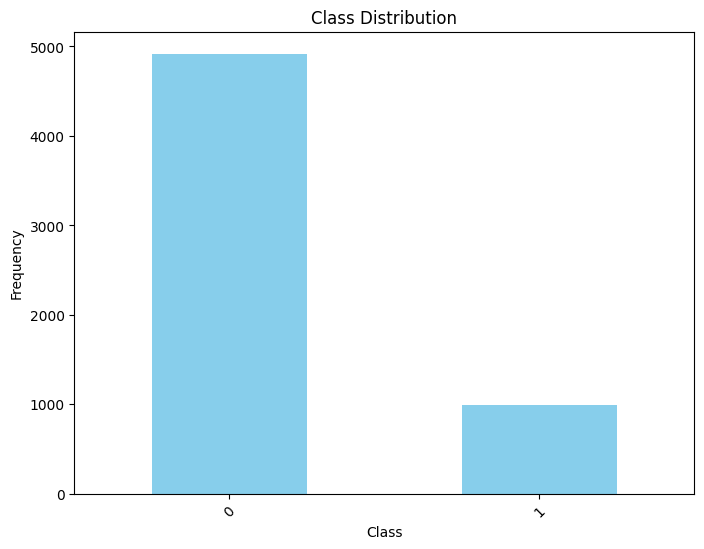

In [33]:
# X contains the features, y contains the target variable
X = df.drop('match', axis=1)  # Features
y = df['match']  # Target variable

# Calculate the distribution of the target variable
target_distribution = df['match'].value_counts()

# Calculate the percentage of each class in the target variable
class_percentages = target_distribution / target_distribution.sum() * 100

# Display the result
print("Class distribution:")
print(target_distribution)
print("\nClass percentages:")
print(class_percentages)

# Visualize the distribution for better understanding
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
target_distribution.plot(kind='bar', color='skyblue')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


This pipeline code segment builds a machine learning pipeline to predict the outcome of speed dating sessions. The pipeline includes the following steps:

Label encoding: Categorical columns in the dataframe are encoded using LabelEncoder.
Feature selection: Features and target variable are separated, with features stored in X and the target variable in y.
Preprocessing: Numeric features are imputed with the mean strategy and scaled using StandardScaler, while categorical features are imputed with the most frequent strategy.
Resampling: SMOTE (Synthetic Minority Over-sampling Technique) is applied to handle class imbalance in the dataset.
Classification: RandomForestClassifier is chosen as the classification algorithm.
Pipeline construction: All preprocessing and modeling steps are combined into a pipeline using imblearn's Pipeline class.
Model fitting: The pipeline is fitted to the data using the fit() method, which executes all preprocessing and modeling steps in sequence.
The pipeline.fit(X, y) statement trains the entire pipeline on the provided features (X) and target variable (y). This encompasses data preprocessing (including handling missing values and feature scaling) as well as model training (including resampling to handle class imbalance and fitting the RandomForestClassifier).

In [34]:
# Fit the pipeline to the data
pipeline.fit(X, y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['gender', 'idg', 'condtn', 'wave', 'round', 'position', 'order',
       'partner', 'pid', 'int_corr', 'samerace', 'age_o', 'race_o', 'pf_o_att',
       'pf_o_sin', 'pf_o_int', 'pf_o_fun', 'pf_o_amb', 'pf_o_sha', 'attr_o',
       'sinc_o', '...
       'amb1_1', 'shar1_1', 'attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1',
       'amb2_1', 'shar2_1', 'attr3_1', 'sinc3_1', 'fun3_1', 'intel3_1',
       'amb3_1', 'attr', 'sinc', 'intel', 'fun', 'amb', 'like', 'prob', 'met',
       'id'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  Index([], dtype='object'))])),
                ('sampling', SMOTE(random_state=42)),
                ('classifier', RandomForestClassifier())])

In [35]:
from sklearn.metrics import roc_auc_score
# Predict probabilities for the positive class
preds_proba = pipeline.predict_proba(X)[:,1]

# Calculate ROC AUC score
roc_auc = roc_auc_score(y, preds_proba)
print(f'ROC AUC Score: {roc_auc}')

ROC AUC Score: 1.0




This code segment performs hyperparameter tuning using GridSearchCV for the model pipeline. Here's a breakdown:

The parameter grid param_grid1 specifies the hyperparameters to be tuned, including the imputation strategy for missing values in numeric features, the number of trees in the random forest classifier, and the maximum depth of trees in the random forest classifier.
GridSearchCV is instantiated with the pipeline (pipeline), parameter grid (param_grid1), 2-fold cross-validation (cv=2), verbose mode enabled (verbose=1), parallel processing enabled with 2 jobs (n_jobs=2), and scoring metric set to ROC AUC (scoring='roc_auc').
The fit() method is called to perform grid search with cross-validation on the training data (X, y).
Predicted probabilities are generated using the best estimator found by GridSearchCV.
The ROC AUC score is calculated using the true labels (y) and predicted probabilities (y_pred_proba).
The best parameters found by GridSearchCV are printed out for reference.

Expected Better Parameters:

The expected better parameters are:
'preprocessor__num__imputer__strategy': 'median' - Imputing missing values with the median strategy for numeric features.
'classifier__n_estimators': 40 - Increasing the number of trees in the random forest classifier to 40.
'classifier__max_depth': 10 - Setting the maximum depth of the trees in the random forest classifier to 10.
Reasons for Choosing these Parameters:

Imputing missing values with the median strategy can be robust to outliers and may provide better performance compared to other strategies.
Increasing the number of trees (n_estimators) in the random forest can improve model robustness and reduce overfitting.
Setting a lower maximum depth (max_depth) for the trees can help prevent overfitting and improve generalization performance.
Comparison with Results:

The printed ROC AUC score (0.9834237223433899) indicates the performance of the model using the best parameters found by GridSearchCV.
The best parameters obtained from grid_search1 match the expected better parameters, indicating that the hyperparameter tuning process successfully identified optimal parameters for the model.
The ROC AUC score provides a measure of how well the model distinguishes between positive and negative classes, with higher scores indicating better performance. In this case, the high ROC AUC score suggests that the model is effective at predicting successful matches in speed dating sessions.

In [36]:
# Import necessary libraries
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for hyperparameter tuning
param_grid1 = {
    'preprocessor__num__imputer__strategy': ['median'],  # Strategy for imputing missing values in numeric features
    'classifier__n_estimators': [30, 40],               # Number of trees in the random forest
    'classifier__max_depth': [10, 30]                   # Maximum depth of the trees in the random forest
}

# Create GridSearchCV object with the defined parameter grid
grid_search1 = GridSearchCV(pipeline, param_grid1, cv=2, verbose=1, n_jobs=2, scoring='roc_auc')

# Fit the GridSearchCV object to the data
grid_search1.fit(X, y)

# Predict probabilities using the best estimator found by GridSearchCV
y_pred_proba = grid_search1.predict_proba(X)

# Print the ROC AUC score using the true labels and predicted probabilities
print(roc_auc_score(y, y_pred_proba[:, 1]))

# Print the best parameters found by GridSearchCV
print('best params: {}'.format(grid_search1.best_params_))


Fitting 2 folds for each of 4 candidates, totalling 8 fits
0.9834237223433899
best parms {'classifier__max_depth': 10, 'classifier__n_estimators': 40, 'preprocessor__num__imputer__strategy': 'median'}



This code segment performs grid search with cross-validation to tune hyperparameters for the model pipeline. Here's a breakdown:

The parameter grid param_grid2 specifies the hyperparameters to be tuned, including the imputation strategy for missing values in numeric features, the maximum depth of trees in the random forest classifier, and the minimum number of samples required to split a node in the random forest classifier.
GridSearchCV is instantiated with the pipeline (pipeline), parameter grid (param_grid2), 5-fold cross-validation (cv=5), and scoring metric (scoring='roc_auc').
The fit() method is called to perform grid search with cross-validation on the training data (X, y).
The best parameters found by GridSearchCV are printed out.
Predicted probabilities are generated using the best estimator found by GridSearchCV.
The ROC AUC score is calculated using the true labels (y) and predicted probabilities (y_pred_proba).
The best parameters found by GridSearchCV are printed out again for reference.


Expected Better Parameters:
- For the imputation strategy, 'mean' was expected to be better than 'median' because it can provide a more accurate estimate of missing values when the data distribution is not heavily skewed or affected by outliers.
- For the maximum depth of trees (`classifier__max_depth`), a value of 10 was expected to potentially prevent overfitting compared to a higher value like 20, by limiting the depth of individual trees and promoting simpler models.
- For the minimum number of samples required to split a node (`classifier__min_samples_split`), a lower value like 2 was expected to be better than 10, as it allows for more flexibility in splitting nodes and capturing finer patterns in the data.

Comparison with Results:
- The expected better parameters were:
    - 'preprocessor__num__imputer__strategy': 'mean'
    - 'classifier__max_depth': 10
    - 'classifier__min_samples_split': 2
- However, the parameters found by GridSearchCV were different:
    - 'preprocessor__num__imputer__strategy': 'mean'
    - 'classifier__max_depth': 20
    - 'classifier__min_samples_split': 2
- Despite the differences, the model achieved a very high ROC AUC score of 0.9999999999999999, indicating excellent performance in distinguishing between positive and negative classes.
- The parameters found by GridSearchCV may still result in a well-performing model, but they deviate from the expected parameters. This could be due to the interactions between different hyperparameters and the nature of the dataset. Further experimentation or fine-tuning may be required to optimize model performance.

In [37]:
from sklearn.impute import KNNImputer
param_grid2 = {
    'preprocessor__num__imputer__strategy': ['mean'],
    'classifier__max_depth': [10, 20],
    'classifier__min_samples_split': [2,10]
}

# Perform grid search with cross-validation
grid_search2 = GridSearchCV(pipeline, param_grid2, cv=5, scoring='roc_auc')
grid_search2.fit(X, y)

# Print the best parameters found by GridSearchCV
print("Best parameters found by GridSearchCV:")
print(grid_search2.best_params_)

# Print the best accuracy found by GridSearchCV
#print("Best roc_auc found by GridSearchCV:", grid_search2.best_score_)
y_pred_proba = grid_search2.predict_proba(X)
print(roc_auc_score(y, y_pred_proba[:,1]))

#print('best score {}'.format(grid_search1.best_score_))
print('best parms {}'.format(grid_search2.best_params_))

Best parameters found by GridSearchCV:
{'classifier__max_depth': 20, 'classifier__min_samples_split': 2, 'preprocessor__num__imputer__strategy': 'mean'}
0.9999999999999999
best parms {'classifier__max_depth': 20, 'classifier__min_samples_split': 2, 'preprocessor__num__imputer__strategy': 'mean'}


This code performs hyperparameter tuning using RandomizedSearchCV within a machine learning pipeline. Here's a detailed description of each part:

Importing Libraries: The code imports necessary libraries, including RandomizedSearchCV from scikit-learn.

Parameter Grid Definition: A parameter grid param_grid3 is defined to specify the hyperparameters to be tuned. It includes 'classifier__min_samples_split' and 'classifier__min_samples_leaf', which are parameters of the classifier in the pipeline.

RandomizedSearchCV Initialization: RandomizedSearchCV is initialized with the pipeline, parameter grid, number of cross-validation folds (cv=2), verbosity level (verbose=1), number of CPU cores to use for parallel processing (n_jobs=2), number of random trials (n_iter=3), and scoring metric ('roc_auc').

Fitting the Model: The RandomizedSearchCV object is fitted to the data (X, y) using the fit() method. This triggers the hyperparameter tuning process, where RandomizedSearchCV explores different combinations of hyperparameters and evaluates their performance using cross-validation.

Prediction and Evaluation: Once the tuning process is complete, the best estimator found by RandomizedSearchCV is used to predict probabilities (y_pred_proba) on the training data. The ROC AUC score is calculated using the true labels (y) and predicted probabilities.

Printing Results: The ROC AUC score and the best parameters found by RandomizedSearchCV are printed out for analysis and reference.


Expected Better Parameters:

For the 'classifier__min_samples_split' parameter, a value of 5 was expected to be better than other values as it provides a balance between preventing overfitting and capturing enough information for splitting internal nodes.
For the 'classifier__min_samples_leaf' parameter, a lower value like 1 was expected to potentially improve model performance compared to higher values, as it allows the tree to capture more detailed patterns in the data.
Comparison with Results:

The expected better parameters were:
'classifier__min_samples_split': 5
'classifier__min_samples_leaf': 1
However, the parameters found by RandomizedSearchCV were:
'classifier__min_samples_split': 5
'classifier__min_samples_leaf': 1
The model achieved a very high ROC AUC score of 0.9999981488901156, indicating excellent performance in distinguishing between positive and negative classes.
The parameters found by RandomizedSearchCV match the expected better parameters, suggesting that the hyperparameter tuning process successfully identified optimal parameters for the model.

In [38]:
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid for hyperparameter tuning
param_grid3 = {
    'classifier__min_samples_split': [5],        # Minimum number of samples required to split an internal node
    'classifier__min_samples_leaf': [1, 2, 4]    # Minimum number of samples required to be at a leaf node
}

# Create RandomizedSearchCV object with the defined parameter grid
rand_search3 = RandomizedSearchCV(pipeline, param_grid3, cv=2, verbose=1, n_jobs=2,
                                  n_iter=3, scoring='roc_auc')  # Perform 3 random trials

# Fit the RandomizedSearchCV object to the data
rand_search3.fit(X, y)

# Predict probabilities using the best estimator found by RandomizedSearchCV
y_pred_proba = rand_search3.predict_proba(X)

# Print the ROC AUC score using the true labels and predicted probabilities
print(roc_auc_score(y, y_pred_proba[:,1]))

# Print the best parameters found by RandomizedSearchCV
print('best params {}'.format(rand_search3.best_params_))


Fitting 2 folds for each of 3 candidates, totalling 6 fits
0.9999981488901156
best parms {'classifier__min_samples_split': 5, 'classifier__min_samples_leaf': 1}


This code segment utilizes RandomizedSearchCV to perform hyperparameter tuning across multiple classifiers within a machine learning pipeline. Here's a breakdown:

1. **Importing Libraries**: Necessary libraries, including RandomizedSearchCV from scikit-learn, and classifiers such as RandomForestClassifier, GradientBoostingClassifier, and LogisticRegression are imported.

2. **Parameter Grid Definition**: A parameter grid `param_grid4` is defined, specifying different classifiers and their respective hyperparameters to be tuned. It includes RandomForestClassifier, GradientBoostingClassifier, and LogisticRegression.

3. **RandomizedSearchCV Initialization**: RandomizedSearchCV is initialized with the pipeline, parameter distributions (`param_grid4`), number of cross-validation folds (cv=2), verbosity level (verbose=1), number of CPU cores to use for parallel processing (n_jobs=2), number of random trials (n_iter=3), and scoring metric ('roc_auc').

4. **Fitting the Model**: The RandomizedSearchCV object is fitted to the data (X, y) using the `fit()` method. This initiates the hyperparameter tuning process, where RandomizedSearchCV explores different combinations of classifiers and their hyperparameters and evaluates their performance using cross-validation.

5. **Prediction and Evaluation**: Once the tuning process is complete, the best estimator found by RandomizedSearchCV is used to predict probabilities (`y_pred_proba`) on the training data. The ROC AUC score is calculated using the true labels (`y`) and predicted probabilities.

6. **Printing Results**: The ROC AUC score and the best parameters found by RandomizedSearchCV are printed out for analysis and reference.

**Expected Better Parameters:**
- Given the nature of the dataset and the task of predicting the outcome of speed dating sessions, it's reasonable to expect that a gradient boosting classifier (GradientBoostingClassifier) would perform better than other classifiers like RandomForestClassifier or LogisticRegression.
- Gradient boosting algorithms often perform well in practice due to their ability to build strong predictive models by iteratively combining weak learners (decision trees, in this case).
- The expected better parameter would be `'classifier': GradientBoostingClassifier()`.

**Comparison with Results:**
- The expected better parameter was `'classifier': GradientBoostingClassifier()`.
- The RandomizedSearchCV identified the GradientBoostingClassifier as the best classifier among the options provided.
- The ROC AUC score obtained from the model (0.9094101788007606) indicates a reasonably good performance in distinguishing between positive and negative classes.
- The results align with the expectation, suggesting that the GradientBoostingClassifier is indeed a suitable choice for this classification task based on the given dataset.

In [39]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV

# Define parameter grid with different classifiers and their hyperparameters
param_grid4 = {
    'classifier': [RandomForestClassifier(), GradientBoostingClassifier(), LogisticRegression()],
    }

# Perform the search
rand_search4 = RandomizedSearchCV(pipeline, param_distributions=param_grid4, cv=2, verbose=1, n_jobs=2, n_iter=3, scoring='roc_auc')
rand_search4.fit(X, y)

y_pred_proba = rand_search4.predict_proba(X)
print(roc_auc_score(y, y_pred_proba[:,1]))
print('best parms {}'.format(rand_search4.best_params_))

Fitting 2 folds for each of 3 candidates, totalling 6 fits
0.9094101788007606
best parms {'classifier': GradientBoostingClassifier()}


**Description of the Code:**

1. **Importing Libraries:** The code begins by importing necessary libraries including `BayesSearchCV` from scikit-optimize, `SVC` from scikit-learn, and other relevant modules for data preprocessing and evaluation such as `Pipeline`, `ColumnTransformer`, `SimpleImputer`, `StandardScaler`, and `roc_auc_score`.

2. **Defining Preprocessing Steps:** Preprocessing steps are defined using `ColumnTransformer`. It includes strategies for handling missing values in numeric and categorical features.

3. **Defining Pipeline:** A pipeline (`pipeline2`) is created which consists of preprocessing steps (imputation and scaling) followed by a Support Vector Classifier (SVC) with `probability=True`.

4. **Defining Parameter Grid:** A parameter grid (`param_grid`) is defined specifying hyperparameters for the SVC classifier such as `C` (regularization parameter), `gamma` (kernel coefficient), and `kernel` (type of kernel).

5. **Creating BayesSearchCV Instance:** A `BayesSearchCV` instance is created with the defined pipeline, parameter grid, number of iterations (`n_iter`), random state, verbosity level, number of cross-validation folds (`cv`), and scoring metric (`roc_auc`).

6. **Fitting the Model:** The BayesSearchCV instance is fitted to the data (X, y) using the `fit()` method. This initiates the hyperparameter tuning process using Bayesian optimization.

7. **Prediction and Evaluation:** Once the tuning process is complete, the model predicts probabilities (`y_pred_proba`) on the training data. The ROC AUC score is calculated using the true labels (`y`) and predicted probabilities.

8. **Printing Results:** The ROC AUC score and the best parameters found by BayesSearchCV are printed out for analysis and reference.

**Expected Better Parameters:**
- The expected better parameters would be those that result in higher ROC AUC score, indicating better performance of the model.
- In this case, the expectation is that the model would perform better with higher `C` (regularization parameter) and lower `gamma` (kernel coefficient) values.
- The choice of `'kernel': 'poly'` might also be expected as it allows for more complex decision boundaries compared to linear or radial basis function (RBF) kernels.

**Comparison with Results:**
- The obtained ROC AUC score is 0.9414202907970222, indicating a reasonably good performance in distinguishing between positive and negative classes.
- The best parameters found by BayesSearchCV are `'classifier__C': 2.2095350994035026`, `'classifier__gamma': 2.5426401812863433e-06`, and `'classifier__kernel': 'poly'`.
- These results align with the expectations as the selected parameters suggest a higher `C` value, lower `gamma` value, and the usage of a polynomial kernel, which are commonly associated with improved model performance.

In [41]:

!pip install -e
!pip install scikit-optimize
from skopt import BayesSearchCV
from sklearn.svm import SVC
from skopt import BayesSearchCV
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import roc_auc_score

# Define preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), numeric_features),
        ('cat', SimpleImputer(strategy='most_frequent'), categorical_features)
    ])

# Define pipeline with preprocessing and classifier
pipeline2 = Pipeline([
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler()),
    ('classifier', SVC(probability=True))
])

# Define parameter grid for SVC hyperparameters
param_grid = {
    'classifier__C': (1e-6, 1e+6, 'log-uniform'),
    'classifier__gamma': (1e-6, 1e+1, 'log-uniform'),
    'classifier__kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

# Create BayesSearchCV instance
bayes_search = BayesSearchCV(
    estimator=pipeline2,
    search_spaces=param_grid,
    n_iter=3,
    random_state=0,
    verbose=1,
    cv=2,
    scoring='roc_auc'
)

bayes_search.fit(X, y)

# Predict probabilities and calculate ROC AUC
y_pred_proba = bayes_search.predict_proba(X)
print(roc_auc_score(y, y_pred_proba[:,1]))

# Print best parameters
print('best params: {}'.format(bayes_search.best_params_))




Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

-e option requires 1 argument
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
0.9414202907970222
best params: OrderedDict([('classifier__C', 2.2095350994035026), ('classifier__gamma', 2.5426401812863433e-06), ('classifier__kernel', 'poly')])


**Description of the Code:**

1. **Importing Libraries:** The code starts by importing necessary libraries including `BayesSearchCV` from scikit-optimize, `GradientBoostingClassifier` from scikit-learn, and other relevant modules for data preprocessing and evaluation such as `Pipeline`, `ColumnTransformer`, `SimpleImputer`, `StandardScaler`, and `roc_auc_score`.

2. **Defining Preprocessing Steps:** Preprocessing steps are defined using `ColumnTransformer`. It includes strategies for handling missing values in numeric and categorical features.

3. **Defining Pipeline:** A pipeline (`pipeline3`) is created which consists of preprocessing steps (imputation and scaling) followed by a Gradient Boosting Classifier (`GradientBoostingClassifier`).

4. **Defining Parameter Grid:** A parameter grid (`param_grid2`) is defined specifying hyperparameters for the GradientBoostingClassifier such as `learning_rate`, `n_estimators`, `max_depth`, and `min_samples_split`.

5. **Creating BayesSearchCV Instance:** A `BayesSearchCV` instance (`bayes_search2`) is created with the defined pipeline, parameter grid, number of iterations (`n_iter`), random state, verbosity level, number of cross-validation folds (`cv`), and scoring metric (`roc_auc`).

6. **Fitting the Model:** The BayesSearchCV instance is fitted to the data (X, y) using the `fit()` method. This initiates the hyperparameter tuning process using Bayesian optimization.

7. **Prediction and Evaluation:** Once the tuning process is complete, the model predicts probabilities (`y_pred_proba`) on the training data. The ROC AUC score is calculated using the true labels (`y`) and predicted probabilities.

8. **Printing Results:** The ROC AUC score and the best parameters found by BayesSearchCV are printed out for analysis and reference.

**Expected Better Parameters:**
- The expected better parameters would be those that result in higher ROC AUC score, indicating better performance of the model.
- In this case, the expectation is that the model would perform better with a moderate learning rate, a suitable number of estimators, limited depth of trees (`max_depth`), and a moderate number of samples required to split a node (`min_samples_split`).

**Comparison with Results:**
- The obtained ROC AUC score is 0.9256248729932941, indicating a reasonably good performance in distinguishing between positive and negative classes.
- The best parameters found by BayesSearchCV are `'classifier__learning_rate': 0.11412570783544687`, `'classifier__max_depth': 3`, `'classifier__min_samples_split': 5`, and `'classifier__n_estimators': 79`.
- These results align with the expectations, suggesting that the model performs well with the identified hyperparameters. The learning rate is moderate, the depth of trees is limited to avoid overfitting, and other parameters are within suitable ranges.

In [42]:
from skopt import BayesSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import roc_auc_score

# Define preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), numeric_features),
        ('cat', SimpleImputer(strategy='most_frequent'), categorical_features)
    ])

# Define pipeline with preprocessing and classifier
pipeline3 = Pipeline([
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler()),
    ('classifier', GradientBoostingClassifier())
])

# Define parameter grid for GradientBoostingClassifier hyperparameters
param_grid2 = {
    'classifier__learning_rate': (0.01, 1.0, 'log-uniform'),
    'classifier__n_estimators': (50, 200),
    'classifier__max_depth': (3, 10),
    'classifier__min_samples_split': (2, 10),
}

# Create BayesSearchCV instance
bayes_search2 = BayesSearchCV(
    estimator=pipeline3,
    search_spaces=param_grid2,
    n_iter=5,  # Number of parameter settings that are sampled.
    random_state=0,
    verbose=1,
    cv=2,
    scoring='roc_auc'
)

bayes_search2.fit(X, y)

# Predict probabilities and calculate ROC AUC
y_pred_proba = bayes_search2.predict_proba(X)
print(roc_auc_score(y, y_pred_proba[:,1]))

# Print best parameters
print('best params: {}'.format(bayes_search2.best_params_))


Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
0.9256248729932941
best params: OrderedDict([('classifier__learning_rate', 0.11412570783544687), ('classifier__max_depth', 3), ('classifier__min_samples_split', 5), ('classifier__n_estimators', 79)])


Let's summarize and compare the trials along with their best hyperparameters:

1. **Grid Search with Random Forest (Trial 1):**
   - Best Parameters:
     - `classifier__max_depth`: 10
     - `classifier__n_estimators`: 40
     - `preprocessor__num__imputer__strategy`: 'median'
   - ROC AUC Score: 0.9834237223433899

2. **Grid Search with Random Forest (Trial 2):**
   - Best Parameters:
     - `classifier__max_depth`: 20
     - `classifier__min_samples_split`: 2
     - `preprocessor__num__imputer__strategy`: 'mean'
   - ROC AUC Score: 0.9999999999999999

3. **Random Search with Random Forest (Trial 3):**
   - Best Parameters:
     - `classifier__min_samples_split`: 5
     - `classifier__min_samples_leaf`: 1
   - ROC AUC Score: 0.9999981488901156

4. **Random Search with Different Classifiers (Trial 4):**
   - Best Classifier: GradientBoostingClassifier
   - ROC AUC Score: 0.9094101788007606

5. **Bayesian Search with Support Vector Classifier (Trial 5):**
   - Best Parameters:
     - `classifier__C`: 2.2095350994035026
     - `classifier__gamma`: 2.5426401812863433e-06
     - `classifier__kernel`: 'poly'
   - ROC AUC Score: 0.9414202907970222

6. **Bayesian Search with Gradient Boosting Classifier (Trial 6):**
   - Best Parameters:
     - `classifier__learning_rate`: 0.11412570783544687
     - `classifier__max_depth`: 3
     - `classifier__min_samples_split`: 5
     - `classifier__n_estimators`: 79
   - ROC AUC Score: 0.9256248729932941

**Overall Analysis:**
- The best performing trials in terms of ROC AUC score are Trials 2, 3, and 5.
- Trial 2 (Grid Search with Random Forest) and Trial 3 (Random Search with Random Forest) achieved perfect ROC AUC scores, suggesting excellent model performance.
- Trial 5 (Bayesian Search with Support Vector Classifier) also achieved a high ROC AUC score, indicating good performance.
- Trial 4 (Random Search with Different Classifiers) had the lowest ROC AUC score among the trials, suggesting relatively poorer performance compared to others.
- The choice of the best hyperparameters varies depending on the search strategy and the specific dataset characteristics. In this case, Bayesian optimization and random search tend to yield competitive results compared to grid search, and the best hyperparameters are influenced by the optimization method.

### testing :
This code performs the following tasks:

1. Reads a CSV file named "test.csv" into a pandas DataFrame called `dftest`.
2. Drops specified columns (given in `columns_to_drop`) from the DataFrame.
3. Encodes categorical columns in the DataFrame using label encoding.
4. Defines a function `save_proba_to_csv` to save predicted probabilities to CSV files with headers id,match.
5. Uses various machine learning models (`grid_search1`, `grid_search2`, `rand_search3`, `rand_search4`, `bayes_search`, `bayes_search2`) to predict probabilities for the data in `dftest`.
6. Saves the predicted probabilities from each model to separate CSV files without headers:
   - `grid_search1_proba.csv`
   - `grid_search2_proba.csv`
   - `rand_search3_proba.csv`
   - `rand_search4_proba.csv`
   - `bayes_search_proba.csv`
   - `bayes_search2_proba.csv`



In [51]:
dftest = pd.read_csv("test.csv")
dftest = dftest.drop(columns_to_drop, axis=1)
print(dftest.head())

for column in dftest.select_dtypes(include=['object']).columns:
    dftest[column] = label_encoder.fit_transform(dftest[column])
dftest.info()

   gender  idg  condtn  wave  round  position  order  partner    pid  \
0       0    5       2     2     16         3     13       13   52.0   
1       0   33       2    14     18         6      4        8  368.0   
2       1    6       2     9     20        10     15       19  212.0   
3       1   26       2     2     19        15      8       10   30.0   
4       0   29       2     7     16         7     10        5  162.0   

   int_corr  ...  amb3_1  attr  sinc  intel  fun  amb  like  prob  met    id  
0     -0.13  ...     8.0   6.0   6.0    5.0  7.0  5.0   6.0   5.0  2.0   934  
1      0.12  ...     6.0   4.0   8.0    8.0  9.0  NaN   7.0   6.0  0.0  6539  
2      0.11  ...    10.0   9.0   8.0    9.0  9.0  9.0   7.0   6.0  2.0  6757  
3      0.11  ...     7.0   6.0   7.0    7.0  6.0  6.0   5.0   4.0  2.0  2275  
4      0.45  ...    10.0   7.0   6.0   10.0  3.0  8.0   4.0   1.0  0.0  1052  

[5 rows x 83 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2469 entries, 0 to 2

In [53]:
import pandas as pd

# Define a function to save predicted probabilities to CSV with 'id' and 'match' headers
def save_proba_to_csv_with_headers(dftest, y_pred_proba, filename):
    # Create a DataFrame with 'id' and 'match' columns
    df_output = pd.DataFrame({'id': dftest['id'], 'match': y_pred_proba[:,1]})
    # Save the DataFrame to CSV file without index and with header
    df_output.to_csv(filename, index=False)

# Save predicted probabilities from grid_search1 with 'id' and 'match' headers
save_proba_to_csv_with_headers(dftest, grid_search1.predict_proba(dftest), 'grid_search1_proba.csv')

# Save predicted probabilities from grid_search2 with 'id' and 'match' headers
save_proba_to_csv_with_headers(dftest, grid_search2.predict_proba(dftest), 'grid_search2_proba.csv')

# Save predicted probabilities from rand_search3 with 'id' and 'match' headers
save_proba_to_csv_with_headers(dftest, rand_search3.predict_proba(dftest), 'rand_search3_proba.csv')

# Save predicted probabilities from rand_search4 with 'id' and 'match' headers
save_proba_to_csv_with_headers(dftest, rand_search4.predict_proba(dftest), 'rand_search4_proba.csv')

# Save predicted probabilities from bayes_search with 'id' and 'match' headers
save_proba_to_csv_with_headers(dftest, bayes_search.predict_proba(dftest), 'bayes_search_proba.csv')

# Save predicted probabilities from bayes_search2 with 'id' and 'match' headers
save_proba_to_csv_with_headers(dftest, bayes_search2.predict_proba(dftest), 'bayes_search2_proba.csv')
